# Audio Steganograpghy
----------

In [72]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import IPython.display as ipd

## Preparing
---

### Reading the audio files

In [82]:
rate1, data1 = wav.read("audio1.wav")

total_samples1 = len(data1)
sample_spacing1 = 1/rate1
duration1 = total_samples1*sample_spacing1 # seconds

ipd.Audio(data1, rate=rate1)

In [83]:
rate2, data2 = wav.read("audio2.wav")

total_samples2 = len(data2)
sample_spacing2 = 1/rate2
duration2 = total_samples2*sample_spacing2 # seconds

ipd.Audio(data2, rate=rate2)

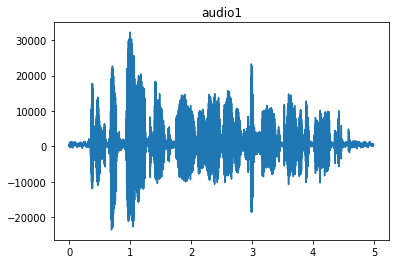

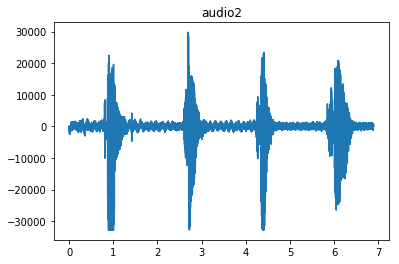

In [86]:
plt.title("audio1")
x1 = np.linspace(0, duration1, total_samples1)
plt.plot(x1, data1)
plt.show()

plt.title("audio2")
x2 = np.linspace(0, duration2, total_samples2)
plt.plot(x2, data2)
plt.show()

### Fourier transform

In [91]:
ft1 = fft(data1)
y_ft1 = 2.0/total_samples1 * np.abs(ft1[:total_samples1//2])
x_ft1 = np.linspace(0.0, 1.0/(2.0*sample_spacing1), total_samples1//2)

ft2 = fft(data2)
y_ft2 = 2.0/total_samples2 * np.abs(ft2[:total_samples2//2])
x_ft2 = np.linspace(0.0, 1.0/(2.0*sample_spacing2), total_samples2//2)

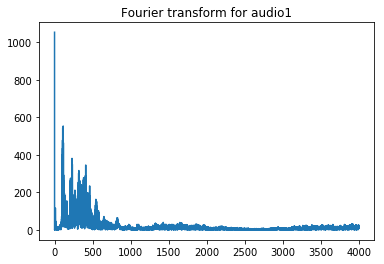

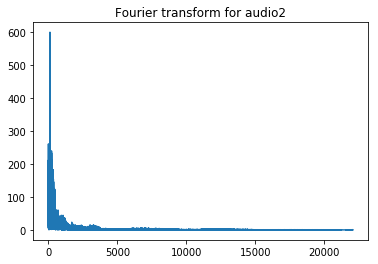

In [99]:
plt.title("Fourier transform for audio1")
plt.plot(x_ft1, y_ft1)
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.show()